# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

(-5.0, 250.0)

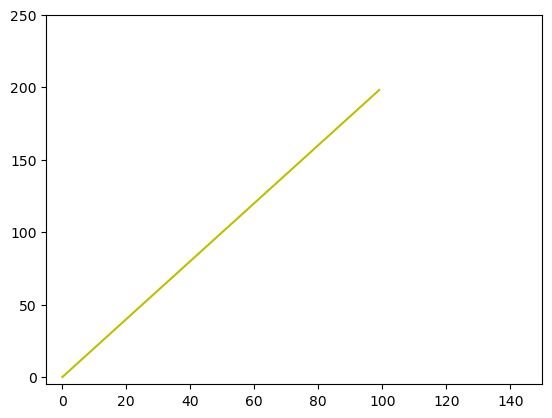

In [12]:
# Method 1

import matplotlib.pyplot as plt
plt.plot(x,y, 'y')
plt.xlim(-5,150)
plt.ylim(-5,250)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

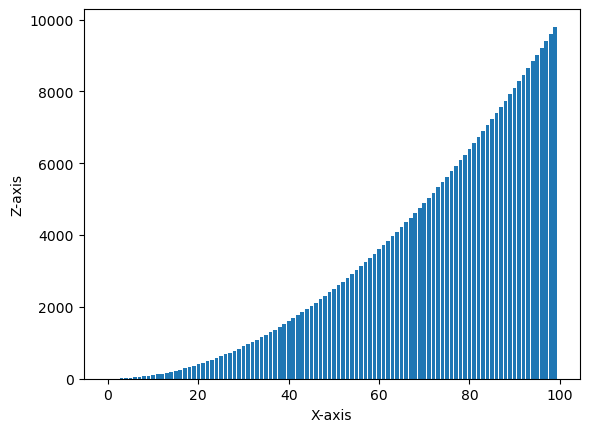

In [22]:
# Method 2

fig, ax = plt.subplots()
ax.bar(x, z)

ax.set_xlabel('X-axis')
ax.set_ylabel('Z-axis')

plt.show()


#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

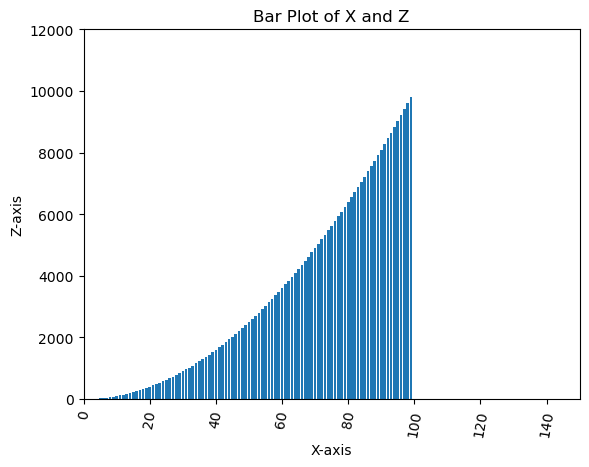

In [25]:
# your code here
fig, ax = plt.subplots()
ax.bar(x, z)

ax.set_xlabel('X-axis')
ax.set_ylabel('Z-axis')
plt.xlim(0,150)
plt.ylim(0,12000)
ax.set_title('Bar Plot of X and Z')
plt.xticks(fontsize = 10, rotation = 80)
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

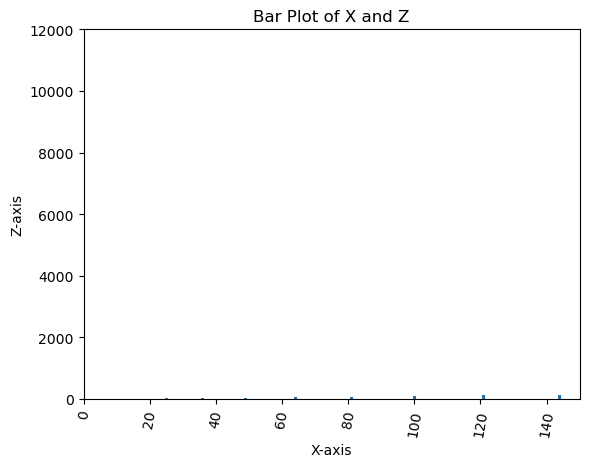

In [27]:
# your code here
fig, ax = plt.subplots()
y = x**2

ax.bar(y, z)

ax.set_xlabel('X-axis')
ax.set_ylabel('Z-axis')
plt.xlim(0,150)
plt.ylim(0,12000)
ax.set_title('Bar Plot of X and Z')
plt.xticks(fontsize = 10, rotation = 80)
plt.show()

NameError: name 'e' is not defined

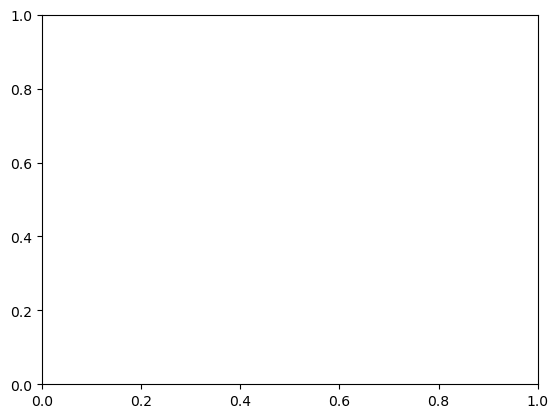

In [28]:
fig, ax = plt.subplots()
y = 𝑒**x

ax.bar(y, z)

ax.set_xlabel('X-axis')
ax.set_ylabel('Z-axis')
plt.xlim(0,150)
plt.ylim(0,12000)
ax.set_title('Bar Plot of X and Z')
plt.xticks(fontsize = 10, rotation = 80)
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

In [ ]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [31]:
# your code here
import pandas as pd

fitbit = pd.read_csv('Fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

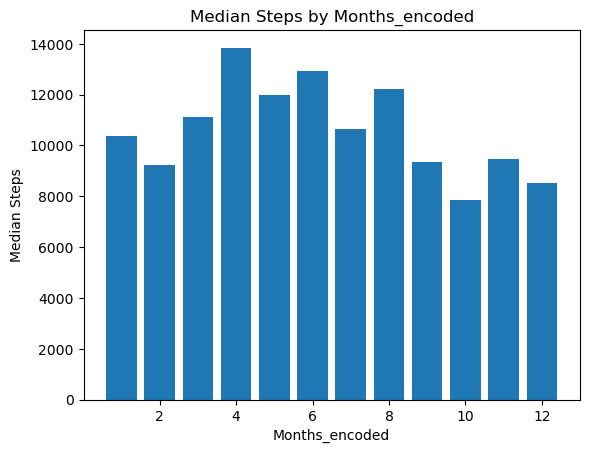

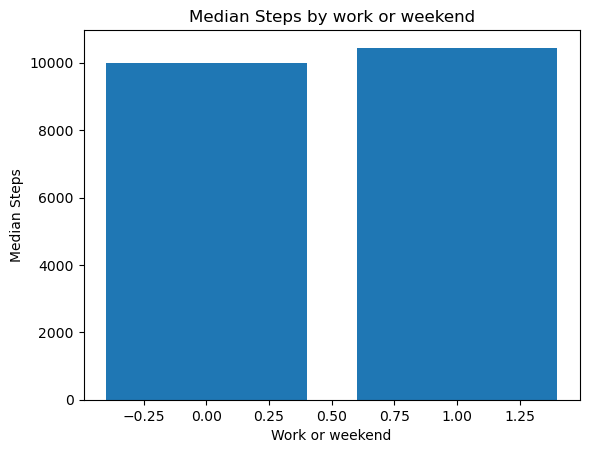

In [64]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

median_steps = fitbit.groupby("Months_encoded")["Steps"].median()

fig, ax = plt.subplots()
ax.bar(median_steps.index, median_steps.values)
ax.set_xlabel('Months_encoded')
ax.set_ylabel('Median Steps')
ax.set_title('Median Steps by Months_encoded')
plt.show()


# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
median_steps = fitbit.groupby("Work_or_Weekend")["Steps"].median()

fig, ax = plt.subplots()
ax.bar(median_steps.index, median_steps.values)
ax.set_xlabel('Work or weekend')
ax.set_ylabel('Median Steps')
ax.set_title('Median Steps by work or weekend')
plt.show()

plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

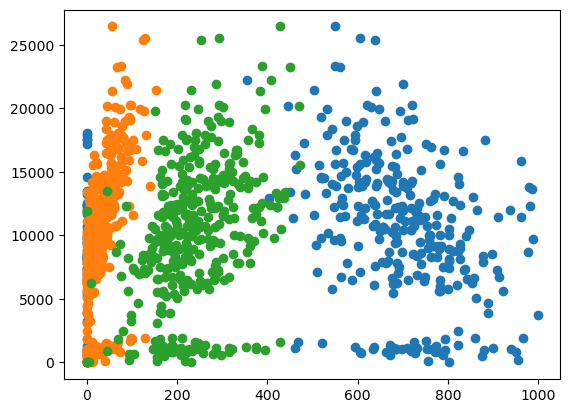

In [70]:
# your code here
fitbit
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.scatter(fitbit['Minutes Lightly Active'], fitbit['Steps'])

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [73]:
# your code here
titanic = pd.read_csv('titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [74]:
# your code here
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [79]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include = np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [81]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include = np.object)

C:\Users\Vasco Nicolau\AppData\Local\Temp\ipykernel_43316\3546012311.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  titanic.select_dtypes(include = np.object)


,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [82]:
# your code here
plt.style.use("classic")

fig = plt.figure(figsize=(12, 6))

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5df5002e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5df500880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5df4f1fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5df500e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5df4f3130>],
 'means': []}

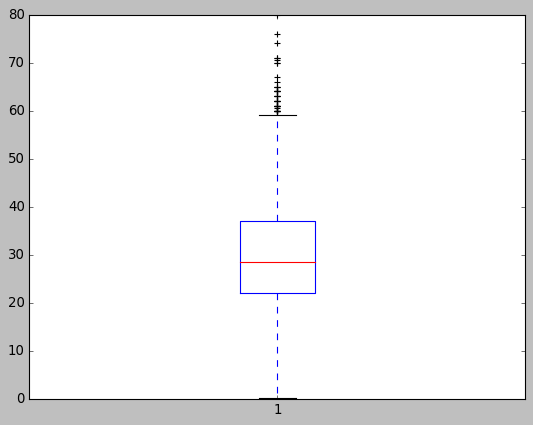

In [86]:
# your code here
plt.boxplot(titanic['Age'])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

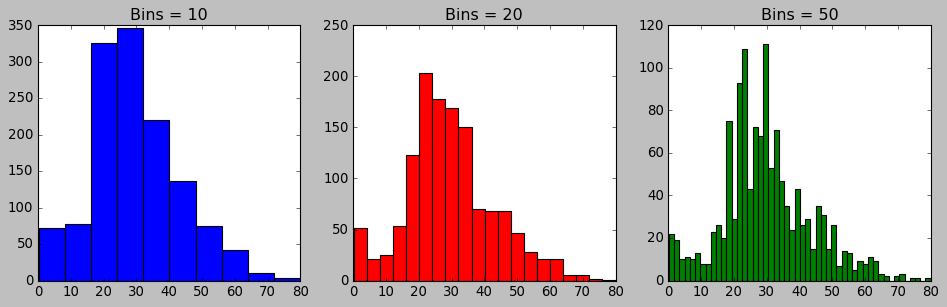

In [96]:
# your code here

fig, agg = plt.subplots(1, 3, figsize=(12, 4))
ages = titanic['Age']

agg[0].hist(ages, bins=10, color='blue')
agg[0].set_title("Bins = 10")

agg[1].hist(ages, bins=20, color='red')
agg[1].set_title("Bins = 20")

agg[2].hist(ages, bins=50, color='green')
agg[2].set_title("Bins = 50")

plt.tight_layout()
plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
Higher the number of bins, easier the visualization and understanding of the distribution
However, for presentation 50 bins might be too much

"""


#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Density'>

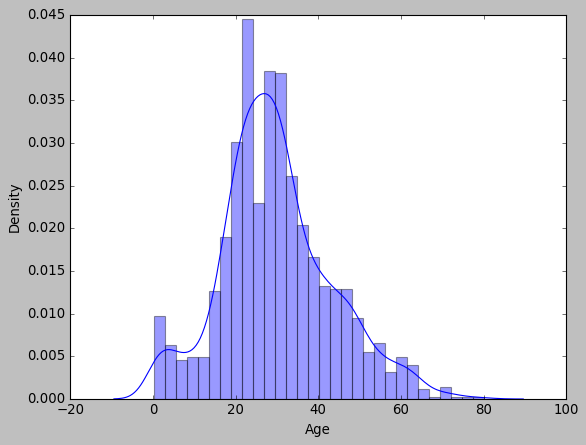

In [100]:
# your code here
import seaborn as sns

sns.distplot(ages, color='blue')


#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<BarContainer object of 2 artists>

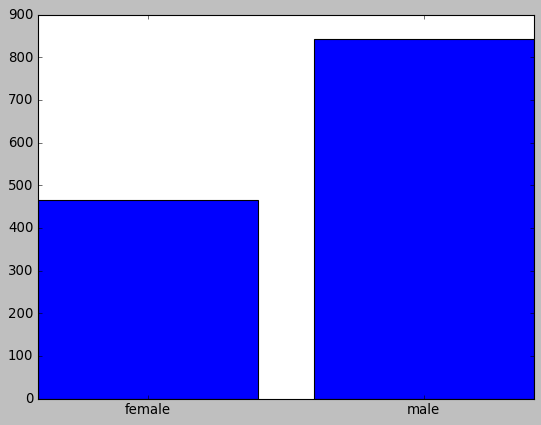

In [114]:
# Method 1 - matplotlib
# your code here
gd = titanic['Gender']
genders, counts = np.unique(gd, return_counts=True)

plt.bar(genders, counts, color='blue')

<AxesSubplot:xlabel='Gender', ylabel='count'>

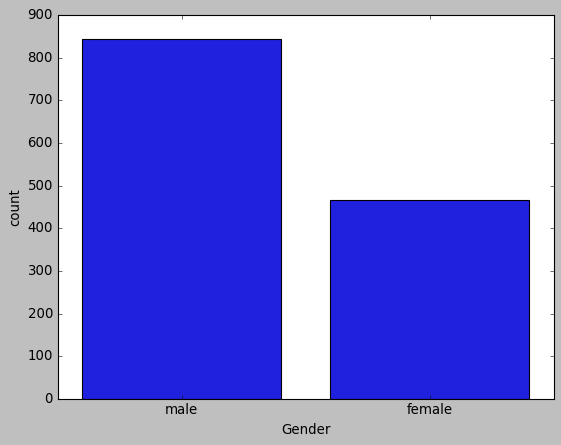

In [106]:
# Method 2 - seaborn
# your code here

sns.countplot(x='Gender', data=titanic, color='blue')

#### Use the right plot to visualize the column `Pclass`.

<BarContainer object of 3 artists>

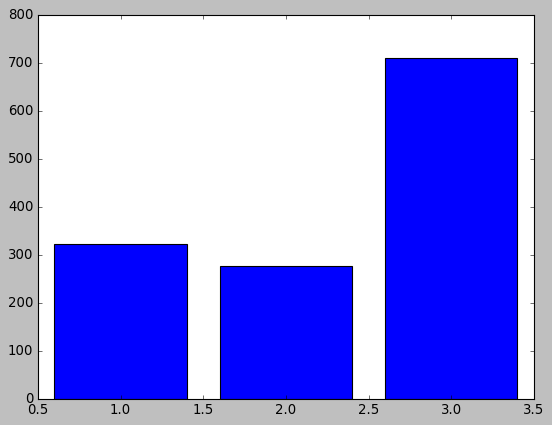

In [116]:
# your code here

clas = titanic['Pclass']
class_count, counts = np.unique(clas, return_counts=True)

plt.bar(class_count, counts, color='blue')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5e49eaf70>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5e49fb550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5e49eaca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5e49fbaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5e49fbdc0>],
 'means': []}

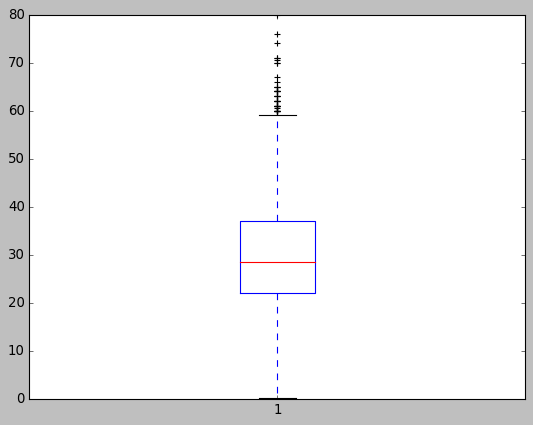

In [117]:
# your code here
plt.boxplot(titanic['Age'])

In [ ]:
"""
With boxplot we have access to the 1st and 3rd quartil, median min, max and some outliers

"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
median is around 30
25% os the pop has an age below 23
25% is above 37/38
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

Text(0.5, 1.0, 'Histogram of Age')

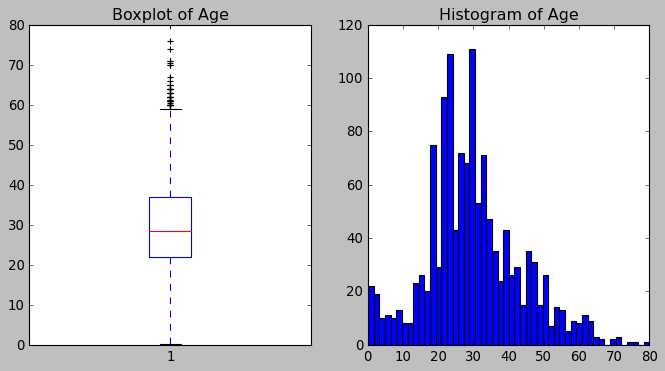

In [131]:
# your code here

fig, (p1, p2) = plt.subplots(1, 2, figsize=(10, 5))

p1.boxplot(ages)
p1.set_title("Boxplot of Age")

p2.hist(ages, bins=50, color='blue', edgecolor='black')
p2.set_title("Histogram of Age")



#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
the mode is 30 
And I can see in a bettter way the outliers
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

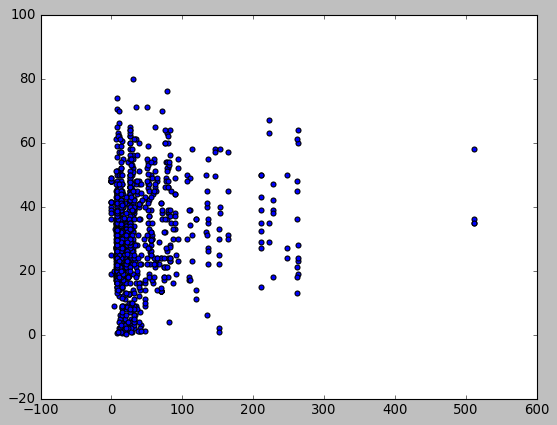

In [128]:
# Method 1 - matplotlib
# your code here

plt.scatter(titanic['Fare'], titanic['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Age'>

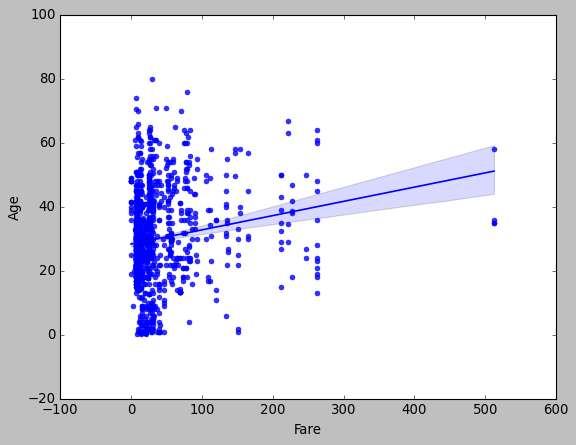

In [129]:
# Method 2 - seaborn
# your code here

sns.regplot(x=titanic['Fare'], y=titanic['Age'])


#### Plot the correlation matrix using seaborn.

<AxesSubplot:xlabel='Fare', ylabel='Age'>

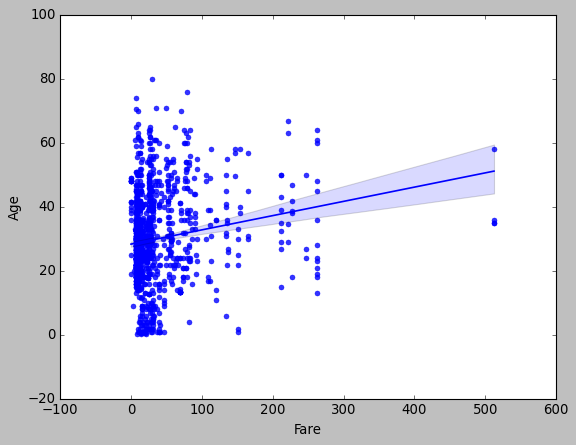

In [130]:
# your code here
sns.regplot(x=titanic['Fare'], y=titanic['Age'], color='blue')


#### What are the most correlated features?

In [ ]:
"""
higher the age higher the fare
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5e506f460>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5e506fa00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5e506f190>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5e506ffa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5e507b2b0>],
 'means': []}

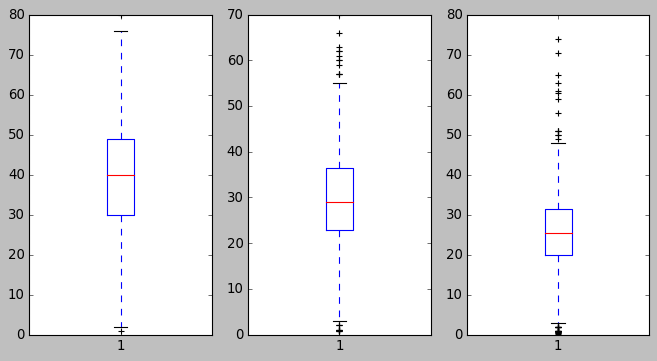

In [136]:
# your code here
# your code here

fig, (p1, p2, p3) = plt.subplots(1, 3, figsize=(10, 5))


pc1 = titanic['Pclass'] == 1
ages = titanic.loc[pc1, 'Age']
p1.boxplot(ages)


pc2 = titanic['Pclass'] == 2
ages = titanic.loc[pc2, 'Age']
p2.boxplot(ages)


pc3 = titanic['Pclass'] == 3
ages = titanic.loc[pc3, 'Age']
p3.boxplot(ages)





#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

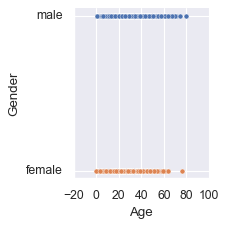

In [151]:
# your code here
# Ages = titanic['Age']
# Gender = titanic['Gender']
# bbb = titanic.loc[:,['Age', 'Gender']]
# sns.distplot(bbb)

g = sns.FacetGrid(data=titanic, hue='Gender')
g.map(sns.scatterplot, 'Age', 'Gender')